# **Loan Classification Case**

### The flow of the case study is as below:

- Reading the data in python
- Defining the problem statement
- Identifying the Target variable
- Looking at the distribution of Target variable
- Basic Data exploration
- Rejecting useless columns
- Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
- Feature Selection based on data distribution
- Outlier treatment
- Missing Values treatment
- Visual correlation analysis
- Statistical correlation analysis (Feature Selection)
- Converting data to numeric for ML
- Sampling and K-fold cross validation
- Trying multiple classification algorithms
- Selecting the best Model
- Deploying the best model in production

In [24]:
import warnings
warnings.filterwarnings('ignore')

#### Reading the dataset

In [25]:
import pandas as pd
import numpy as np

LoanData=pd.read_csv('../Datasets/LoanApprovalData.csv', encoding='latin')

print('Shape of loan dataset', LoanData.shape)

# Removing the duplicate rows if any
LoanData=LoanData.drop_duplicates()

print('Shape After removing duplicates', LoanData.shape)

Shape of loan dataset (614, 13)
Shape After removing duplicates (614, 13)


In [26]:
LoanData.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
LoanData['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

### **Defining the problem statement:**
To create predictive model to tell weather a loan would be approved or not?

- Target Variable: Loan_Status
- Predictors: Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, etc.
- Loan_Status:
    - 'Y': Loan approved
    - 'N': Loan not approved

### **Determining the type of Machine Learning:**
Creating a supervised ML classification model, as the target variable is categorical.

### **Looking at the distribution of Target Variable:**
- If target variable too skewed, then the predictive modelling may not be possible.
- Bell curve is desirable but slightly positive skew or negative skew is also fine
- When performing Classification, make sure there is a balance in the distribution of each class else ML algos ability to learn is impacted.

<Axes: xlabel='Loan_Status'>

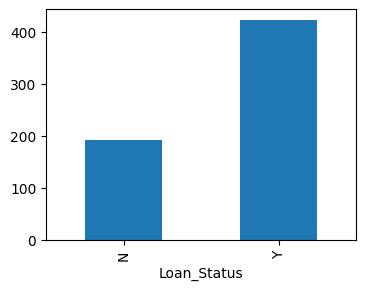

In [28]:
%matplotlib inline
# Creating Bar Chart as the Target variable is Categorical
GroupedData=LoanData.groupby('Loan_Status').size()
GroupedData.plot(kind='bar', figsize=(4,3))

### **Basic Data Exploration**
- Step to:
    - Gauge the overall data
    - Volume of the data
    - Types of columns in the data

- Initial assessment of the data being done to identify which columns are Quantitative, Categorical or Qualitative.

- Checking how each column would affect the values of the Target Variable.
    - If the column affects the final answer then remove the column.

In [29]:
LoanData.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


'Loan_ID' is one such columns which seems useless as it does not affect the approval or rejection of a loan.

- Observing the summarized information of the data
- Data types, Missing values based on the number of null values Vs total rows, etc.
- Remove those variables from data which have too many missing values (Missing Values > 30%)
- Remove Qualitative variables which cannot be used in Machine Learning

In [30]:
LoanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [31]:
# Looking at the descriptive statistics of the data
LoanData.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


- Finding unique values for each column
- To understand which column is **Categorical** and which column is **Continuous**
- If number of unique values,
    - < 20 -> Category
    - else continuous

In [32]:
LoanData.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

### **Basic Data Exploration Results**

- **Loan_ID**: Qualitative. Rejected. This column does not affect the loan approval or rejection.
- **Gender**: Categorical. Selected. Missing value treatment required.
- **Married**: Categorical. Selected. Missing value treatment required.
- **Dependents**: Categorical. Selected. Missing value treatment required.
- **Education**: Categorical. Selected.
- **Self_Employed**: Categorical. Selected.
- **ApplicantIncome**: Quantitative. Selected. Missing value treatment required.
- **CoapplicantIncome**: Quantitative. Selected.
- **LoanAmount**: Quantitative. Selected. Missing value treatment required.
- **Loan_Amount_Term**: Categorical. Selected. Missing value treatment required.
- **Credit_History**: Categorical. Selected. Missing value treatment required.
- **Property_Area**: Categorical. Selected.
- **Loan_Status**: Categorical. Selected. This is the Target Variable!

### **Removing useless columns from the data**

Deleting those columns which are not useful in predictive analysis because these variables are qualitative

In [33]:
UselessColumns=['Loan_ID']
LoanData=LoanData.drop(UselessColumns, axis=1)
LoanData.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### **Visual Exploratory Data Analysis**
- Categorical variables: Bar plot
- Continuous variables: Histogram

### **Visualize distribution of all the Categorical Predictor variables in the data using bar plots**:

- Categorical variable in the data can be spotted by looking at the unique values in them.
- A categorical variable contains less than 20 unique values and there is repetition of values, thus data can be grouped by those unique values.

**Categorical Predictors**: 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area'

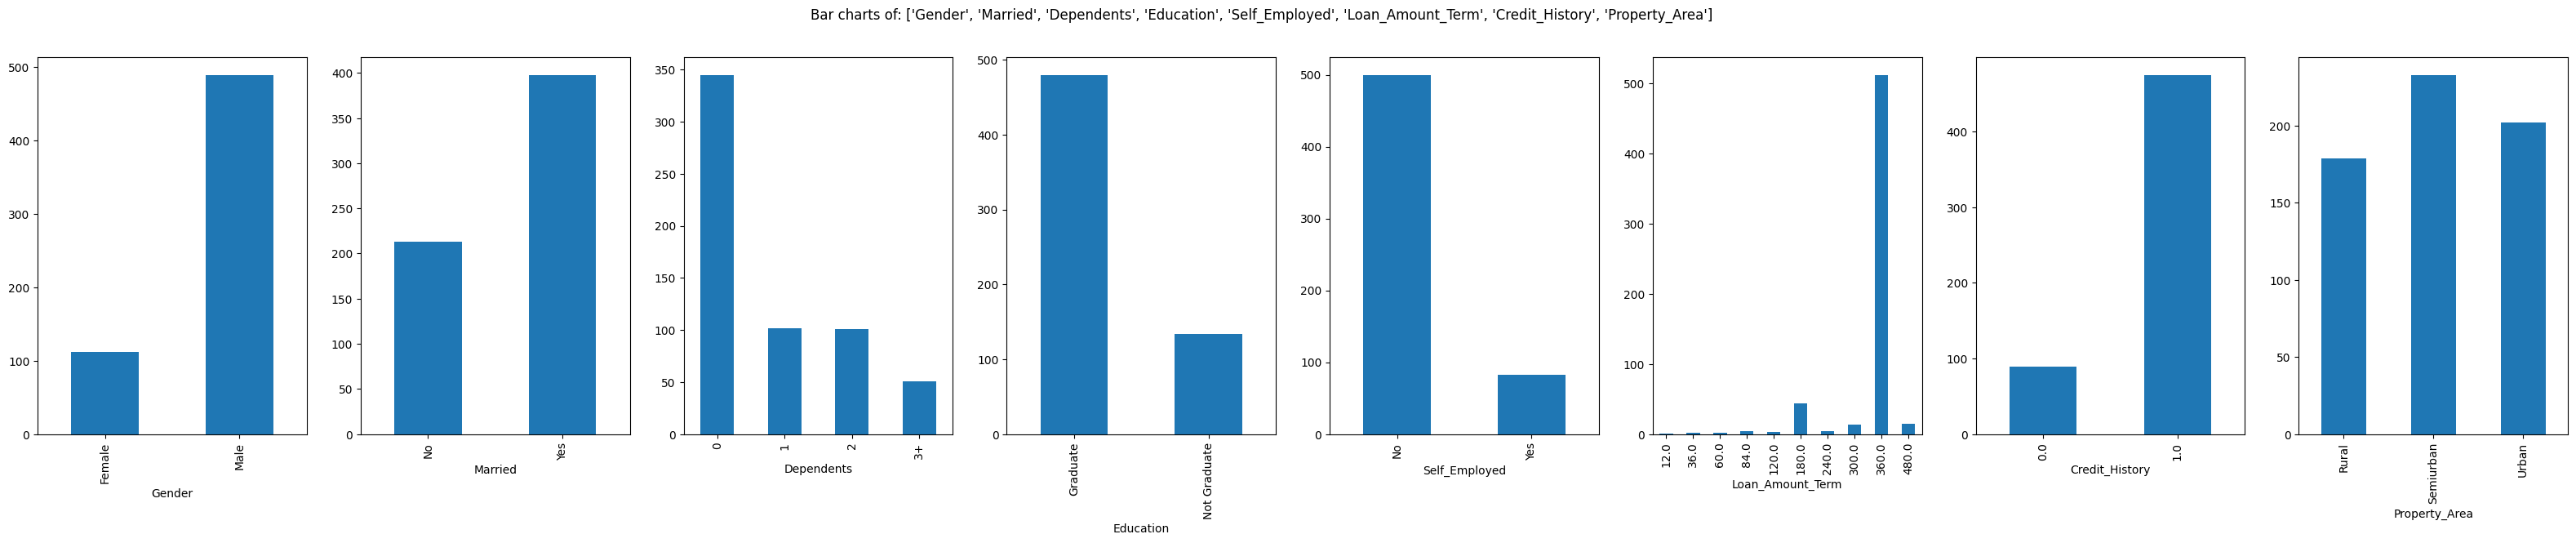

In [34]:
# Function to plot multiple bar charts at once for categorical variables

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40,6))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

#####################################################################
# Calling the function
PlotBarCharts(inpData=LoanData, colsToPlot=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area'])

### **Bar Charts Interpretation**

- The bar charts represent the frequencies of each category in the Y-axis and the category name in the X-axis.
- In ideal bar chart, each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithms to learn from.
- If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present with very low frequency, it may indicate that the data is not suitable for the ML model to learn.
    - Correlation analysis section can be used here and a final call can be taken to select or reject the column.
- 'Loan_Amount_Term' column in data is skewed, where there is only one dominant bar and the other categories are present in very low numbers..
    - Such columns may not be correlated with the target variable but logically it can be a factor in explaining demand on a particular day.

### **Selected Categorical Variables**: 
('Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area')


### **Visualize distribution of all the Continuous Predictor variables in the data using histograms**
There are three predictor variables:

('ApplicantIncome', 'CoapplicantIncome',and 'LoanAmount')

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>, <Axes: >]], dtype=object)

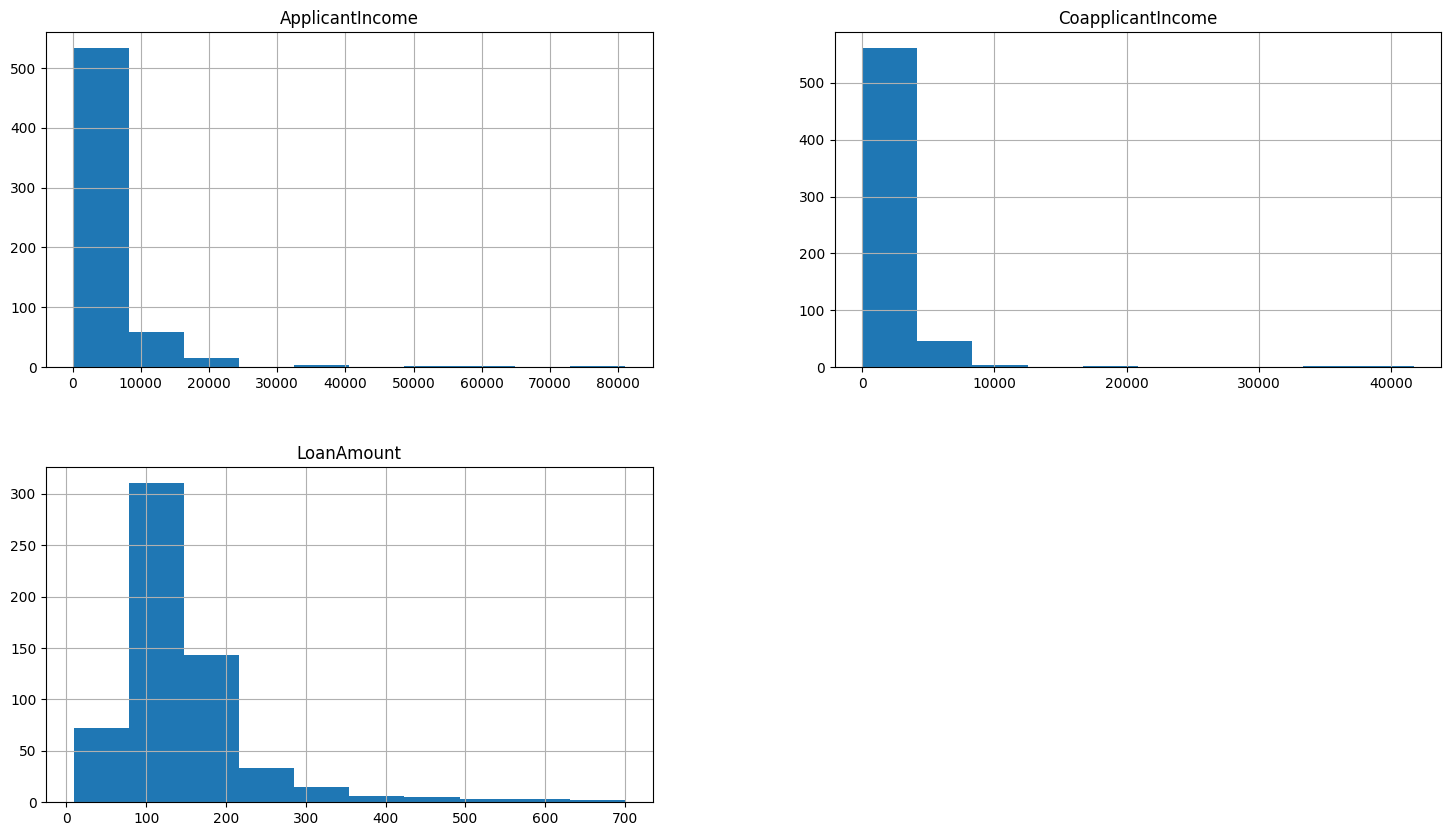

In [36]:
LoanData.hist(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], figsize=(18,10))

### **Histogram Interpretation**:

- Histogram shows the distribution for a single continuous variable.
- The X-axis shows the range of values and Y-axis represent the number of values in that range.
- In the above histogram of "LoanAmount", there are around 320 rows in the data that has a Loan Amount between 90 to 150.
- The ideal outcome for histogram is a bell curve or slightly skewed curve.
- If there is too much skewness, then outlier treatment should be donea dn that column should be re-examined, or simply reject the column if it is not useful.

### **Selected Continuous Variables**: 
- **ApplicantIncome** : Selected. Outliers seen beyond 30000, need to treat them.
- **CoapplicantIncome**: Selected. Outliers seen beyond 15000, need to treat them.
- **LoanAmount**: Selected. Slightly skewed distribution, acceptable.

### **Outlier Treatment**

- Outliers are extreme values in the data which are significantly different from the rest of the data points and can be seen as the tails in the histogram.

- Outlier must be treated one column at a time, as the treatments is slightly different for each column.

#### **Why to remove the outliers**

- Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

- Options to treat outlier in the data:
    - 1. Delete the outlier record, only if there are just few rows lost.
    - 2. Impute the outlier values with a logical business value.

Replacing outliers for 'ApplicantIncome'

In [37]:
# Finding nearest values to 30000 mark
LoanData['ApplicantIncome'][LoanData['ApplicantIncome'] > 20000].sort_values()

130    20166
308    20233
284    20667
506    20833
126    23803
183    33846
443    37719
185    39147
155    39999
171    51763
333    63337
409    81000
Name: ApplicantIncome, dtype: int64

The nearest logical value is 23803, hence, replacing any value above 30000 with it.

In [38]:
# Replacing outliers with nearest possibe value
LoanData['ApplicantIncome'][LoanData['ApplicantIncome'] > 30000] = 23803

Replacing outliers for 'CoapplicantIncome'

In [39]:
# Finding nearest values to 15000 mark
LoanData['CoapplicantIncome'][LoanData['CoapplicantIncome']>10000].sort_values()

9      10968.0
177    11300.0
402    20000.0
417    20000.0
581    33837.0
600    41667.0
Name: CoapplicantIncome, dtype: float64

The nearest logical value is 11300, hence, replacing any value above 15000 with it.

In [40]:
# Replacing outliers with nearest possibe value
LoanData['CoapplicantIncome'][LoanData['CoapplicantIncome']>15000] = 11300

### **Visualizing distribution after outlier treatment**
- The distribution has improved after the outlier treatment. There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>]], dtype=object)

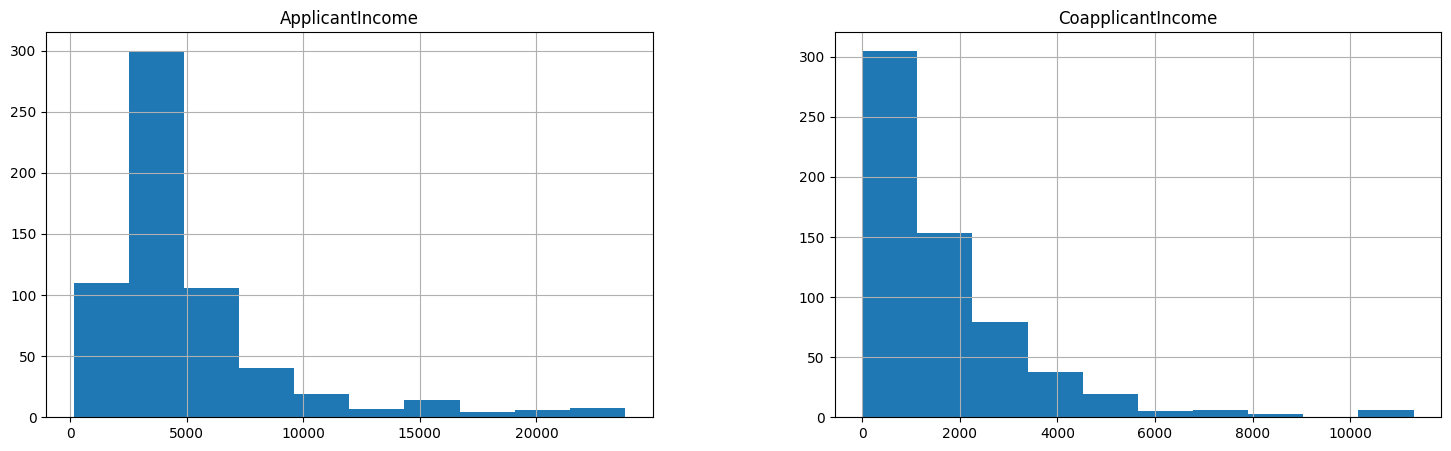

In [41]:
LoanData.hist(['ApplicantIncome', 'CoapplicantIncome'], figsize=(18,5))

#### **Missing values treatment**
- Missing values are treated for each column separately.

- If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.


There are below options for treating missing values in data.

- Delete the missing value rows if there are only few records
- Impute the missing values with MEDIAN value for continuous variables
- Impute the missing values with MODE value for categorical variables
- Interpolate the values based on nearby values
- Interpolate the values based on business logic

In [42]:
# Finding how many missing values are there for each column
LoanData.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Imputing the missing values**
- Using MODE for categorical columns

In [43]:
LoanData['Gender'].fillna(LoanData['Gender'].mode()[0], inplace=True)
LoanData['Married'].fillna(LoanData['Married'].mode()[0], inplace=True)
LoanData['Dependents'].fillna(LoanData['Dependents'].mode()[0], inplace=True)
LoanData['Self_Employed'].fillna(LoanData['Self_Employed'].mode()[0], inplace=True)

# Using Mode value for Loan_Amount_Term since it is a categorical variable
LoanData['Loan_Amount_Term'].fillna(LoanData['Loan_Amount_Term'].mode()[0], inplace=True)
LoanData['Credit_History'].fillna(LoanData['Credit_History'].mode()[0], inplace=True)

# Using Median value for continuous columns
LoanData['LoanAmount'].fillna(LoanData['LoanAmount'].median(), inplace=True)

In [44]:
# Checking missing values again after the treatment
LoanData.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### **Feature Selection**
- Choosing the best columns(Features) which are correlated to the Target variable. 
- This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

#### **Visual exploration of relationship between variables**
- Continuous Vs Continuous ---- Scatter Plot
- Categorical Vs Continuous---- Box Plot
- Categorical Vs Categorical---- Grouped Bar Plots

#### **Statistical measurement of relationship strength between variables**
- Continuous Vs Continuous ---- Correlation matrix
- Categorical Vs Continuous---- ANOVA test
- Categorical Vs Categorical--- Chi-Square test


Target variable is Continuous, hence below two scenarios
- Continuous Target Variable Vs Continuous Predictor
- Continuous Target Variable Vs Categorical Predictor

### **Relationship exploration: Categorical Vs Continuous -- Box Plots**
When the Target variable is categorical and the predictor is Continuous, we can visualize the relationship between the two variables using plots/Boxplots and measure the strength of relation using Anova test.

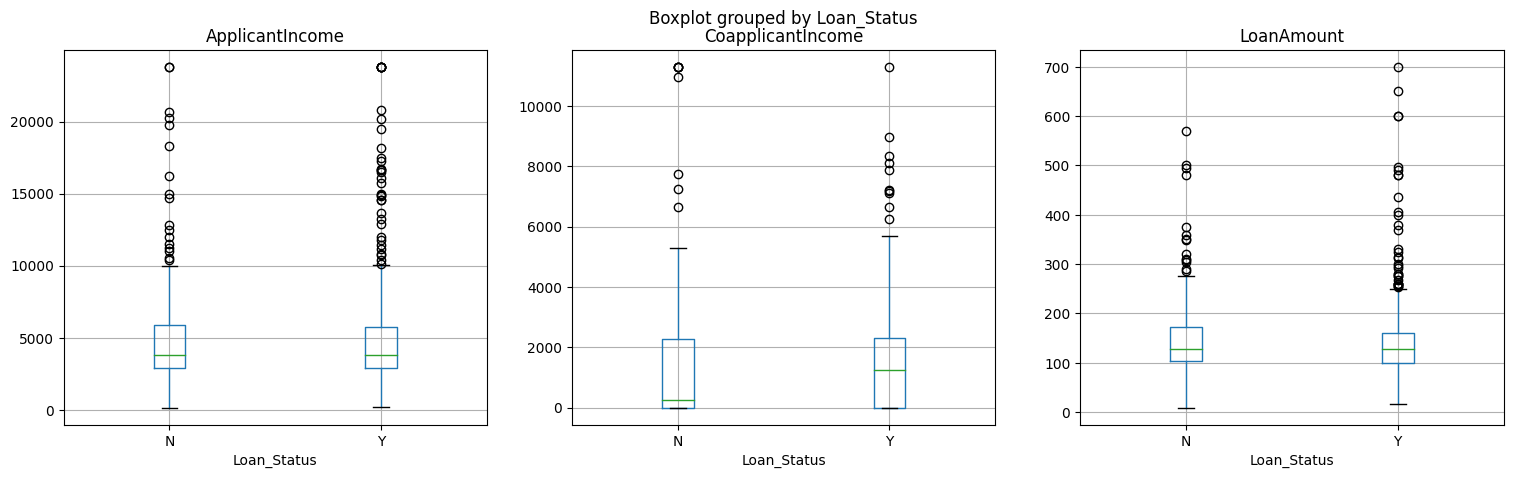

In [45]:
# Box plots for Categorical Target Variable "Loan_Status" and continuous predictors
ContinuousColsList=['ApplicantIncome','CoapplicantIncome', 'LoanAmount']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Loan_Status"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    LoanData.boxplot(column=PredictorCol, by='Loan_Status', figsize=(5,5), vert=True, ax=PlotCanvas[i])

### **Box-Plots Interpretation**

What to look in these box plots:
- These plots give an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.
- If the distribution looks similar for each category (Boxes are in same line), that means the continuous variable has no effect on the target variable.
    - Hence, the variables are not correlated to each other.
- In the first chart "ApplicantIncome" Vs "Loan_Status", the boxes are in the same line. This indicates that the whose loan was rejected and whose loan was approved have the same kind of incomes.
    - Hence cannot distinguish between approval and rejection based on the income of an applicant. Thus the column in NOT correlated with the Loan_Status.
- The other two charts also exhibit same characterstics, hence all three continuous predictors are not correlated with the target variable.

### **Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test**

Analysis of variance (ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable.
- Assumption Null Hypothesis (H0):
    - There is NO relation between the given variable (i.e. The average (mean) values of the numeric Predictor Variable is same for all the group in the categorical Target variable).
- ANOVA Test result: Probability of H0 being true.

In [48]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('ANOVA Results \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [49]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['ApplicantIncome', 'CoapplicantIncome','LoanAmount']
FunctionAnova(inpData=LoanData, TargetVariable='Loan_Status', ContinuousPredictorList=ContinuousVariables)

ANOVA Results 

ApplicantIncome is NOT correlated with Loan_Status | P-Value: 0.9529534007092838
CoapplicantIncome is NOT correlated with Loan_Status | P-Value: 0.6651120750168427
LoanAmount is NOT correlated with Loan_Status | P-Value: 0.4113236546779784


[]

The results of ANOVA confirm our visual analysis using box plots above.

All three columns are NOT correlated with Loan_Status.

### **Relationship exploration: Categorical Vs Categorical --Grouped Bar Charts**

- When:
    - Target variable -> Categorical
    - Predictor -> Categorical
    -   Then we explore the correlation between them visually using barplots ans statistically using Chi-square test

In [50]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=LoanData['Gender'], columns=LoanData['Loan_Status'])
CrossTabResult

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


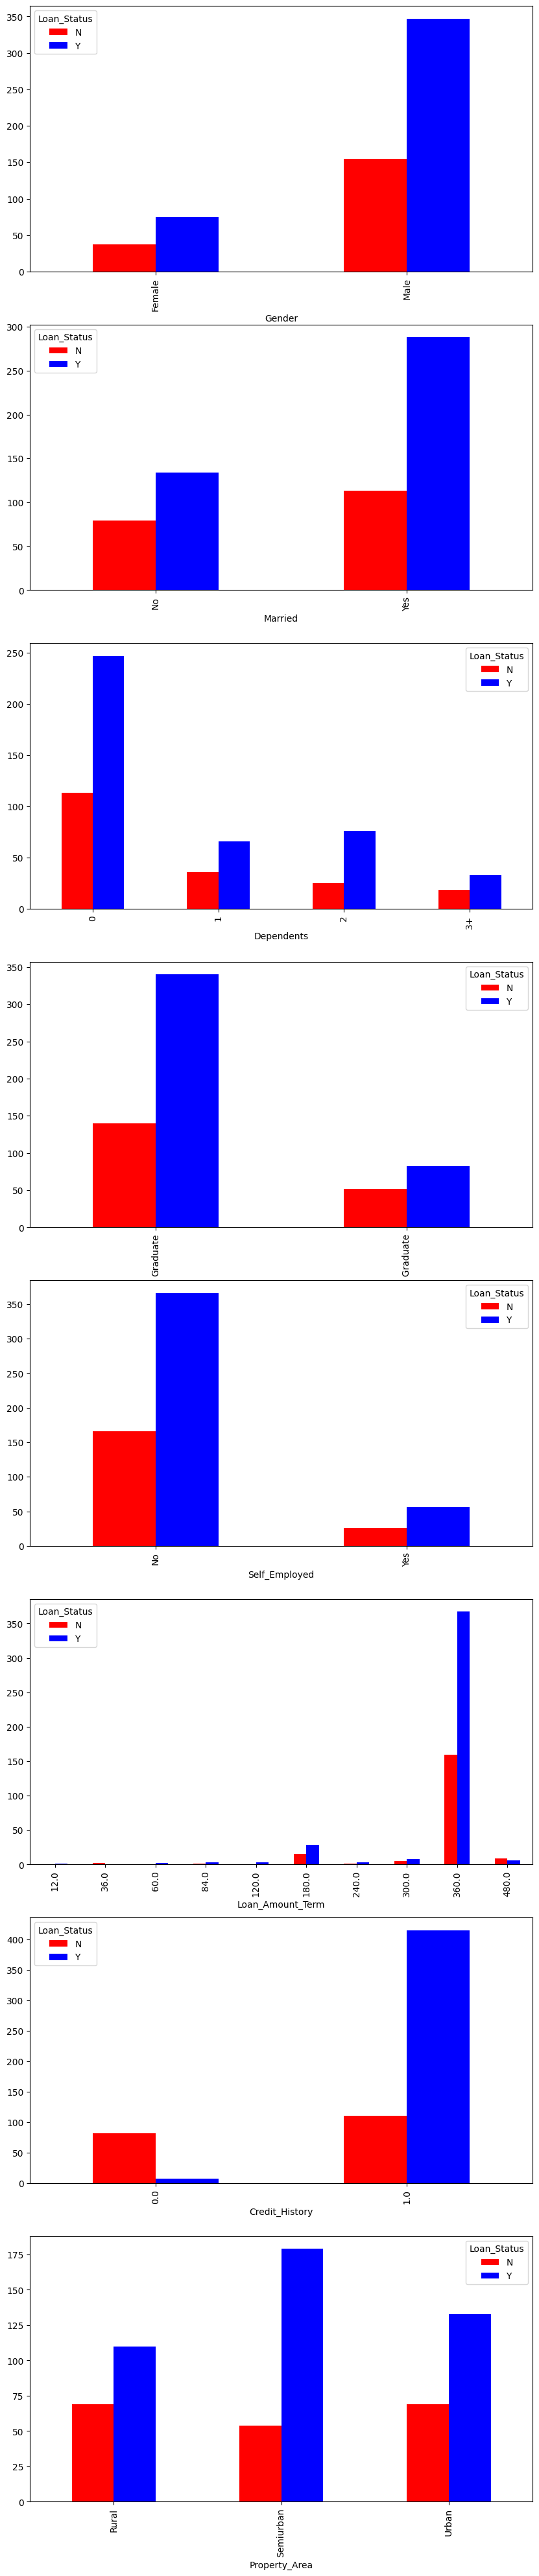

In [51]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,50))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Loan_Status"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=LoanData[CategoricalCol], columns=LoanData['Loan_Status'])
    CrossTabResult.plot.bar(color=['red','blue'], ax=PlotCanvas[i])

### **Grouped Bar charts Interpretation**

- What to look for in these grouped bar charts?

- The grouped bar charts show the frequency in the Y-Axis and the category in the X-Axis. 
- If the ratio of bars is similar across all categories, then the two columns are not correlated. For example, look at the Gender Vs Loan_Status plot. 
- The approved vs rejected ratio for Males is similar to Females:
    - Gender does not affect the Loan approval!. 
    - Hence, these two variables are not correlated.

- In the Credit_History vs Loan_Status plot:
    - The number of approvals are very high if Credit_History=1.0.
    - It means Credit_History affects the loan approval.
    - Hence, two columns are correlated with each other.

We confirm this analysis in below section by using Chi-Square Tests.

### **Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test**

Chi-Square test is conducted to check the correlation between two categorical variables

- Assumption(H0): The two columns are NOT related to each other
- Result of Chi-Sq Test: The Probability of H0 being True

In [52]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [53]:
CategoricalVariables=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area']

# Calling the function
FunctionChisq(inpData=LoanData, 
              TargetVariable='Loan_Status',
              CategoricalVariablesList= CategoricalVariables)

Gender is NOT correlated with Loan_Status | P-Value: 0.7391461310869638
Married is correlated with Loan_Status | P-Value: 0.029608580862582116
Dependents is NOT correlated with Loan_Status | P-Value: 0.3688663081366005
Education is correlated with Loan_Status | P-Value: 0.043099621293573545
Self_Employed is NOT correlated with Loan_Status | P-Value: 1.0
Loan_Amount_Term is NOT correlated with Loan_Status | P-Value: 0.13058516348934335
Credit_History is correlated with Loan_Status | P-Value: 3.418349997909119e-40
Property_Area is correlated with Loan_Status | P-Value: 0.0021360187811644915


['Married', 'Education', 'Credit_History', 'Property_Area']

Based on the results of Chi-Square test, below categorical columns are selected as predictors for Machine Learning

'Married', 'Education', 'Credit_History', 'Property_Area'

### **Selecting final predictors for Machine Learning**

In [54]:
SelectedColumns=['Married', 'Education', 'Credit_History', 'Property_Area']

# Selecting final columns
DataForML=LoanData[SelectedColumns]
DataForML.head()

,Married,Education,Credit_History,Property_Area
0,No,Graduate,1.0,Urban
1,Yes,Graduate,1.0,Rural
2,Yes,Graduate,1.0,Urban
3,Yes,Not Graduate,1.0,Urban
4,No,Graduate,1.0,Urban


In [55]:
# Saving this final data for reference during deployment
DataForML.to_pickle('LoanAppovalDataForML.pkl')

### **Data Pre-processing for Machine Learning**
List of steps performed on predictor variables before data can be used for machine learning

1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

- In this data there is no Ordinal categorical variable which is in string format

### **Converting the binary nominal variable to numeric using 1/0 mapping**

In [56]:
# Treating the binary nominal variables first
DataForML['Married'].replace({'Yes':1, 'No':0}, inplace=True)
DataForML['Education'].replace({'Graduate':1, 'Not Graduate':0}, inplace=True)

# Looking at data after nominal treatment
DataForML.head()

,Married,Education,Credit_History,Property_Area
0,0,1,1.0,Urban
1,1,1,1.0,Rural
2,1,1,1.0,Urban
3,1,0,1.0,Urban
4,0,1,1.0,Urban


### **Converting the nominal variable to numeric using get_dummies()**

In [57]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Loan_Status']=LoanData['Loan_Status']

# Printing sample rows
DataForML_Numeric.head()

,Married,Education,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0,1,1.0,False,False,True,Y
1,1,1,1.0,True,False,False,N
2,1,1,1.0,False,False,True,Y
3,1,0,1.0,False,False,True,Y
4,0,1,1.0,False,False,True,Y


Splitting the data into Train and Testing sample
- Training data: 30% of the data
- Testing data: 70% of the data

In [58]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Married', 'Education', 'Credit_History', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status'],
      dtype='object')

In [59]:
# Separate Target Variable and Predictor Variables
TargetVariable='Loan_Status'
Predictors=['Married', 'Education', 'Credit_History', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

### **Standardization/Normalization of data**

In [ ]:
# Standardization of data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Using Min Max Normalization

# MinMAx normalization
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(429, 6)
(429,)
(185, 6)
(185,)


### **Logistic Regression**

In [62]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           N       0.93      0.42      0.57        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]

Final Average Accuracy of the model: 0.78


### **Decision Trees**

DecisionTreeClassifier(criterion='entropy', max_depth=2)
              precision    recall  f1-score   support

           N       0.93      0.42      0.57        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]

Final Average Accuracy of the model: 0.78


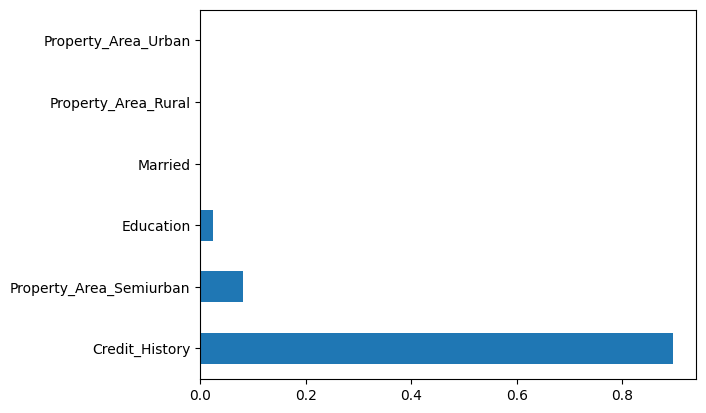

In [63]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=2,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#### **Plotting a Decision**

In [65]:
# Installing the required library for plotting the decision tree
!pip install dtreeplt


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


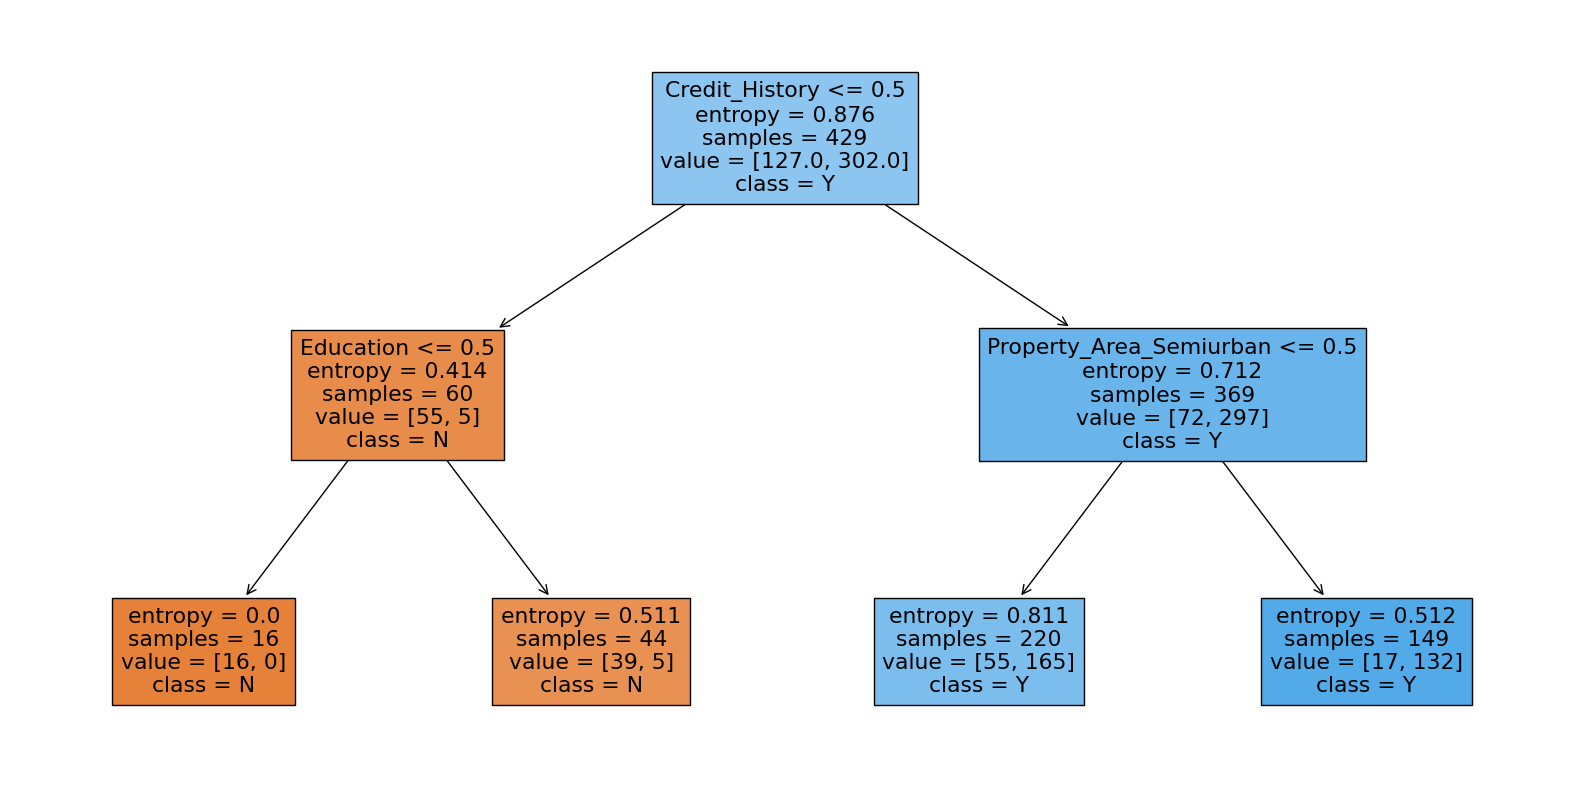

In [74]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=Predictors, class_names=class_names, filled=True)
plt.show()

### **Random Forest**

RandomForestClassifier(max_depth=2)
              precision    recall  f1-score   support

           N       0.93      0.42      0.57        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]

Final Average Accuracy of the model: 0.78


<Axes: >

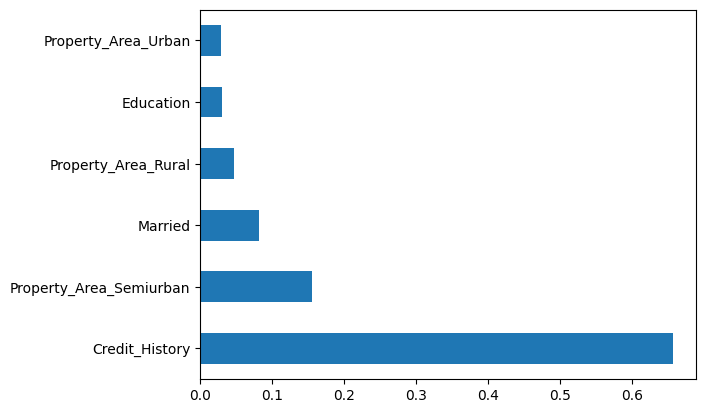

In [75]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, n_estimators=100,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

#### **Plotting one of the Decision Trees in Random Forest**

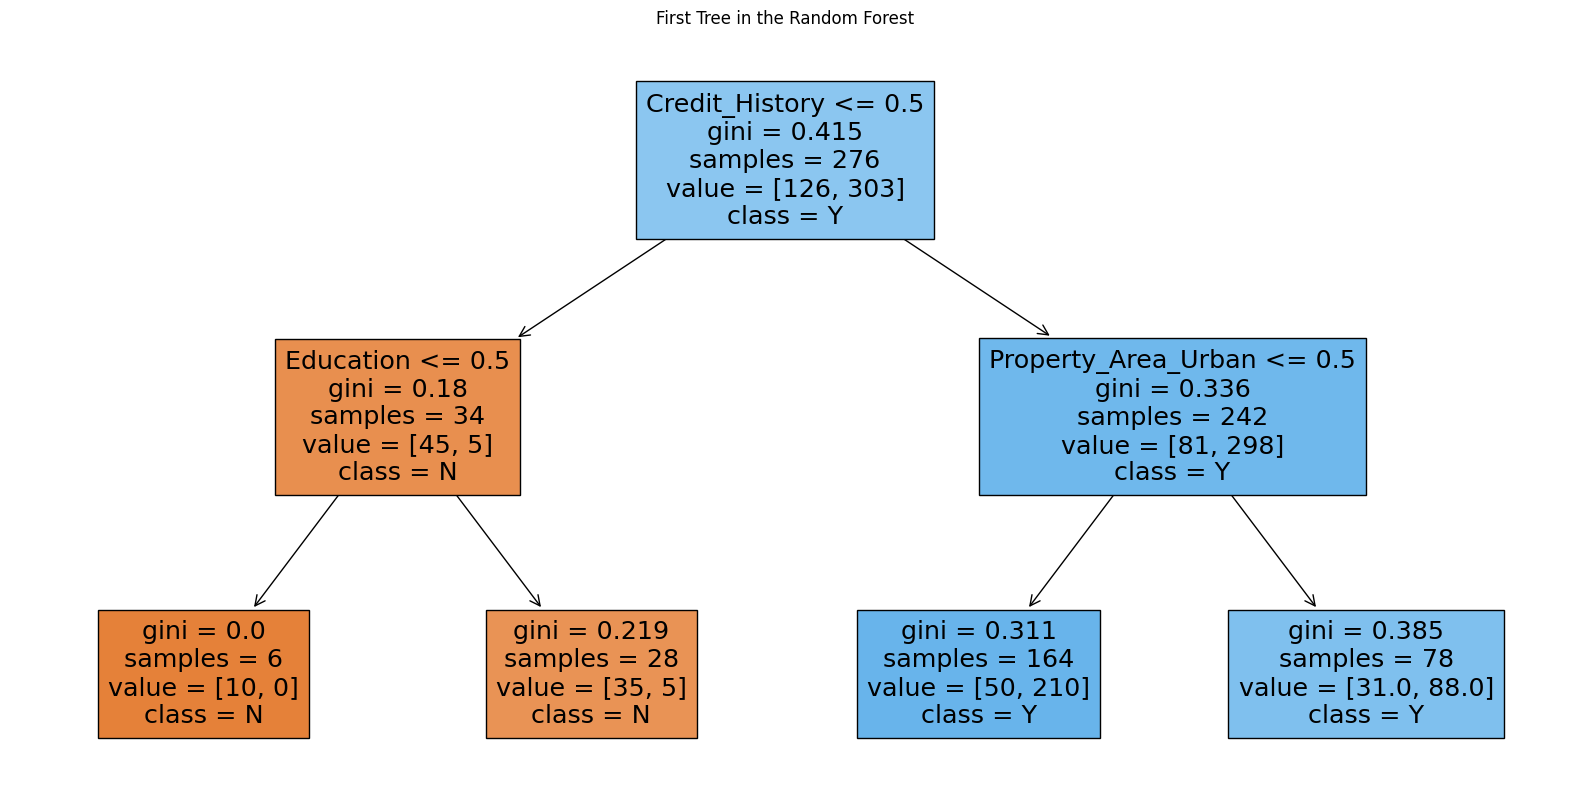

In [78]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming y contains class labels like ['Y', 'N'] or [1, 0]
class_names = np.unique(y).astype(str)  # Ensure it's string labels

plt.figure(figsize=(20,10))
plot_tree(clf.estimators_[0], feature_names=Predictors, class_names=class_names, filled=True)
plt.title("First Tree in the Random Forest")
plt.show()

### **AdaBoost**

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=500)
              precision    recall  f1-score   support

           N       0.93      0.42      0.57        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]

Final Average Accuracy of the model: 0.78


<Axes: >

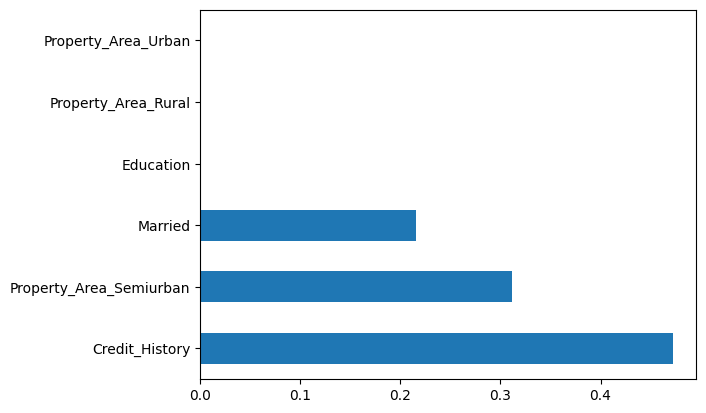

In [81]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=500, estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

#### **Plotting one of the Decision Trees in Random Forest**

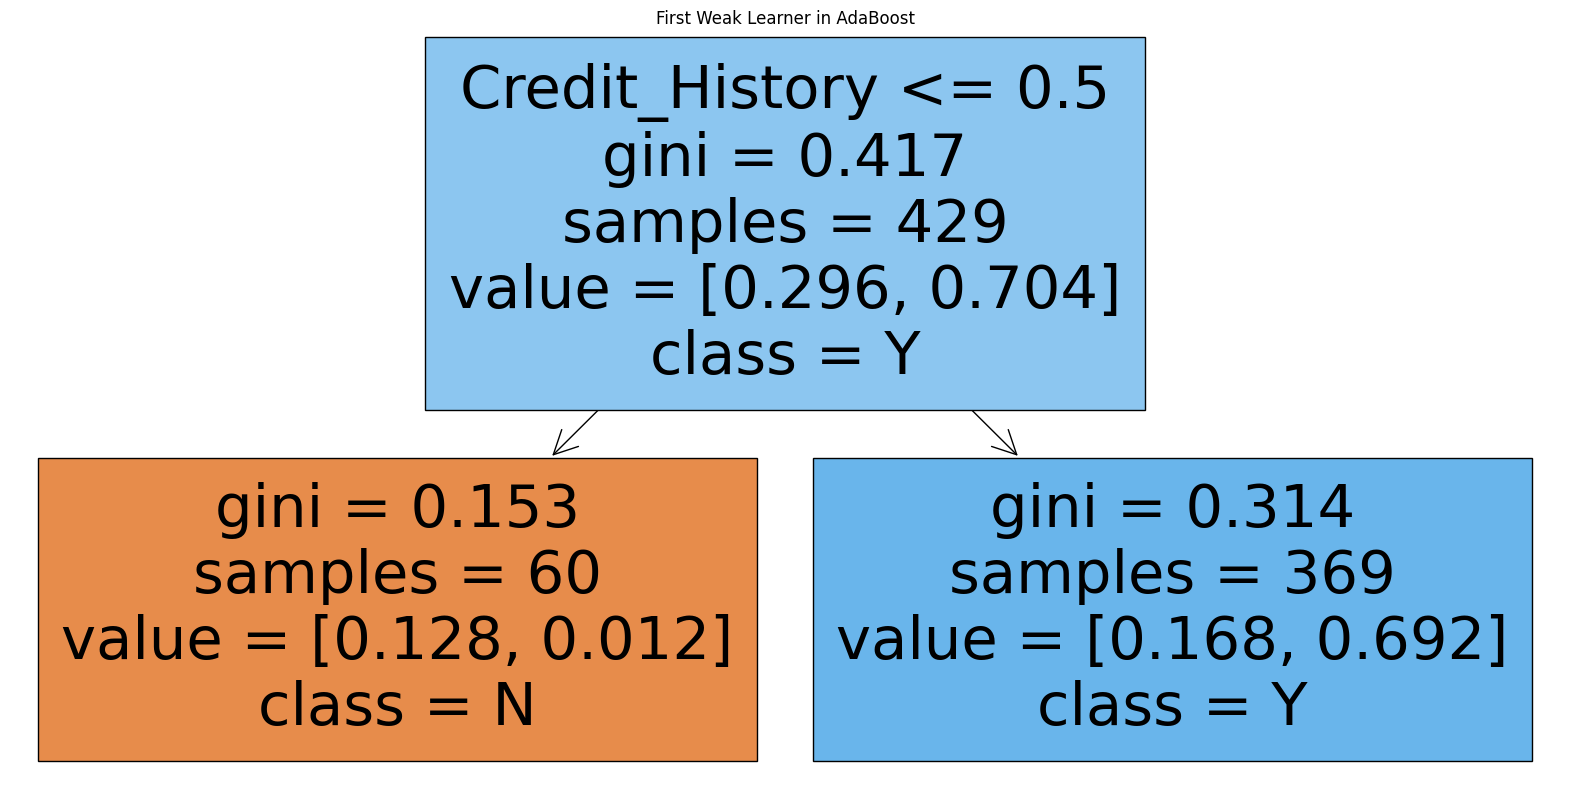

In [82]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np

# Ensure class labels are strings
class_names = np.unique(y).astype(str)

plt.figure(figsize=(20, 10))
plot_tree(AB.estimators_[0], feature_names=Predictors, class_names=class_names, filled=True)
plt.title("First Weak Learner in AdaBoost")
plt.show()

### **XGBoost**

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   ma

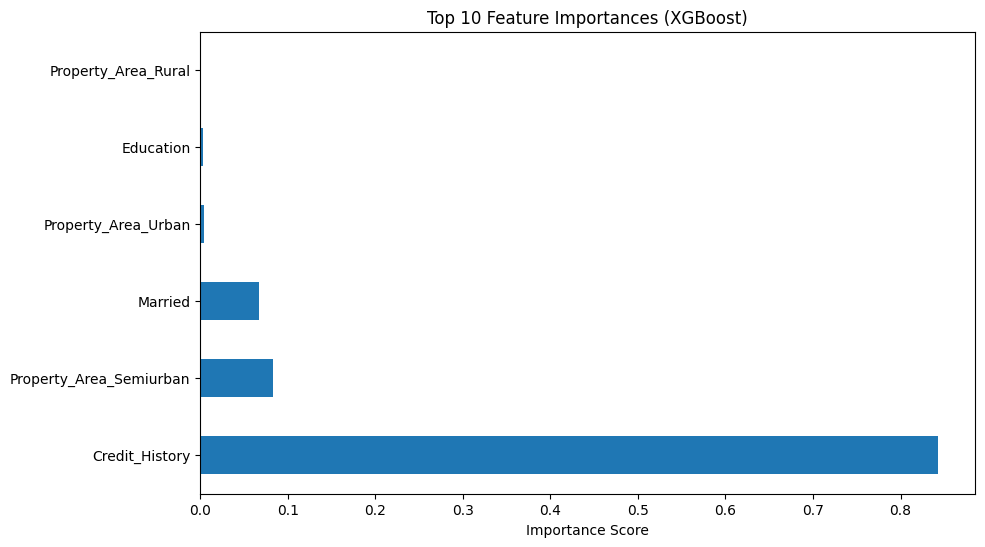

In [84]:
# Required imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, plot_importance

# Assuming X and y are already defined (X = features, y = target)
# If your target values are 'Y' and 'N', they need to be encoded

# Step 1: Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Converts ['Y', 'N'] to [1, 0]

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Step 3: Initialize and train the XGBoost classifier
clf = XGBClassifier(max_depth=2, learning_rate=0.01, n_estimators=200, 
                    objective='binary:logistic', booster='gbtree')
print(clf)

XGB = clf.fit(X_train, y_train)
prediction = XGB.predict(X_test)

# Step 4: Evaluation on test data
print("\nClassification Report:")
print(classification_report(y_test, prediction))
print("Confusion Matrix:")
print(confusion_matrix(y_test, prediction))

f1 = f1_score(y_test, prediction, average='weighted')
print('Accuracy (F1-Weighted) on Testing Sample Data:', round(f1, 2))

# Step 5: 10-Fold Cross Validation
Accuracy_Values = cross_val_score(XGB, X, y_encoded, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('Final Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))

# Step 6: Feature Importance (Top 10)
# If 'Predictors' is a list of your feature names, use it here
# Otherwise, use X.columns if X is a DataFrame
feature_names = Predictors if 'Predictors' in locals() else X.columns

feature_importances = pd.Series(XGB.feature_importances_, index=feature_names)
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (XGBoost)")
plt.xlabel("Importance Score")
plt.show()

#### **Plotting a single Decision tree out of XGBoost**

In [88]:
# from xgboost import plot_tree
# import matplotlib.pyplot as plt

# # Visualizing the first tree in the XGBoost model
# plt.figure(figsize=(20, 10))
# plot_tree(XGB, num_trees=0, figsize=(20,10))  # 'num_trees=0' corresponds to the first tree
# plt.title("First Tree in XGBoost Model")
# plt.show()

### **KNN**

In [89]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.51567852 0.61246434 0.50743155 0.51554611 0.49356873 0.52017245
 0.63642832 0.55498411 0.57326796 0.62098361]

Final Average Accuracy of the model: 0.56


### **SVM**

In [90]:
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=3, kernel='rbf', gamma=0.1)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

SVC(C=3, gamma=0.1)
              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]

Final Average Accuracy of the model: 0.78


### **Naive Bayes**

In [91]:
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
#clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

GaussianNB()
              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]

Final Average Accuracy of the model: 0.78


### **Deployment of the Model**

- Using Adaboost

##### Step 1. Retraining the model using 100% data

In [93]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Using the Adaboost algorithm with final hyperparamters
# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=500, estimator=DTC ,learning_rate=0.01)

# Training the model on 100% Data available
FinalAdaboostModel=clf.fit(X,y)

##### Step 2. Save the model as a serialized file which can be stored anywhere

In [94]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final ZomatoRatingModel
with open('FinalAdaboostModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalAdaboostModel, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: c:\Users\Dell\Desktop\New folder\Case_Studies\Classification


##### Step 3. Create a python function

In [99]:
def PredictLoanStatus(InputLoanDetails):
    import pandas as pd
    Num_Inputs = InputLoanDetails.shape[0]
    
    # Making sure the input data has the same columns as it was used for training the model
    # Also, if standardization/normalization was done, then the same must be done for new input
    
    # Appending the new data with the Training data
    DataForML = pd.read_pickle('LoanAppovalDataForML.pkl')
    
    # Correcting the concat operation (use pd.concat)
    InputLoanDetails = pd.concat([InputLoanDetails, DataForML], ignore_index=True)
    
    # Treating the binary nominal variables first
    InputLoanDetails['Married'].replace({'Yes': 1, 'No': 0}, inplace=True)
    InputLoanDetails['Education'].replace({'Graduate': 1, 'Not Graduate': 0}, inplace=True)
    
    # Generating dummy variables for the rest of the nominal variables
    InputLoanDetails = pd.get_dummies(InputLoanDetails)
    
    # Maintaining the same order of columns as it was during the model training
    Predictors = ['Married', 'Education', 'Credit_History', 'Property_Area_Rural',
                  'Property_Area_Semiurban', 'Property_Area_Urban']
    
    # Generating the input values to the model
    X = InputLoanDetails[Predictors].values[0:Num_Inputs]    
    
    # Generating the standardized values of X since it was done while model training also
    X = PredictorScalerFit.transform(X)
    
    # Loading the Function from the pickle file
    import pickle
    with open('FinalAdaboostModel.pkl', 'rb') as fileReadStream:
        AdaBoost_model = pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
    
    # Generating Predictions
    Prediction = AdaBoost_model.predict(X)
    PredictedStatus = pd.DataFrame(Prediction, columns=['Predicted Status'])
    return PredictedStatus

In [100]:
# Calling the function for some loan applications
NewLoanApplications = pd.DataFrame(
    data=[['No', 'Graduate', 1, 'Urban'],
          ['No', 'Graduate', 0, 'Urban']],
    columns=['Married', 'Education', 'Credit_History', 'Property_Area']
)

print(NewLoanApplications)

# Calling the Function for prediction
PredictedLoanStatus = PredictLoanStatus(InputLoanDetails=NewLoanApplications)
print(PredictedLoanStatus)

  Married Education  Credit_History Property_Area
0      No  Graduate               1         Urban
1      No  Graduate               0         Urban
  Predicted Status
0                Y
1                N


### **Deploying a predictive model as an API**

Function for predictions API

In [101]:
# Creating the function which can take loan inputs and perform prediction
def FunctionLoanPrediction(inp_married, inp_education, inp_credit_history, inp_Property_Area):
    SampleInputData=pd.DataFrame(
     data=[[inp_married, inp_education , inp_credit_history, inp_Property_Area]],
     columns=['Married','Education','Credit_History','Property_Area'])

    # Calling the function defined above using the input parameters
    Predictions=PredictLoanStatus(InputLoanDetails= SampleInputData)

    # Returning the predicted loan status
    return(Predictions.to_json())

# Function call
FunctionLoanPrediction(inp_married='Yes', 
                       inp_education='Graduate',
                       inp_credit_history=1.0,
                       inp_Property_Area='Urban')

'{"Predicted Status":{"0":"Y"}}'

### **Creating Flask API**

In [102]:
from flask import Flask,request,jsonify
import pickle
import pandas as pd
import numpy

In [103]:
app = Flask(__name__)

@app.route('/get_loan_prediction', methods=["GET"])
def get_loan_prediction():
    try:
        # Getting the paramters from API call
        married_value = request.args.get('Married')
        education_value = request.args.get('Education')
        credit_value=float(request.args.get('CreditHistory'))
        property_area_value=request.args.get('PropertyArea')
                
        # Calling the funtion to get loan approval status
        prediction_from_api=FunctionLoanPrediction(inp_married=married_value,
                               inp_education=education_value, 
                               inp_credit_history=credit_value,
                               inp_Property_Area= property_area_value)

        return (prediction_from_api)
    
    except Exception as e:
        return('Something is not right!:'+str(e))

Starting the API engine

In [104]:
import os
if __name__ =="__main__":
    
    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=8080, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:8080
Press CTRL+C to quit
